Predict- Whether this job applicant got salary above 50k or not from previous company- HR

In [28]:
import pandas as pd
import numpy as np

In [29]:
dataset= pd.read_csv("/content/drive/MyDrive/salary.csv")

In [30]:
print(dataset.shape)
print(dataset.head(5))


(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


Maapping salary to binary data

In [31]:
income_set = set(dataset["income"])
dataset['income']= dataset['income'].map({'<=50K':0 ,'>50K': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


In [32]:
X= dataset.iloc[:, :-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [33]:
Y= dataset.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

In [34]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [35]:
error= []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1,40):
  model= KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, Y_train)
  pred_i= model.predict(X_test)
  error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

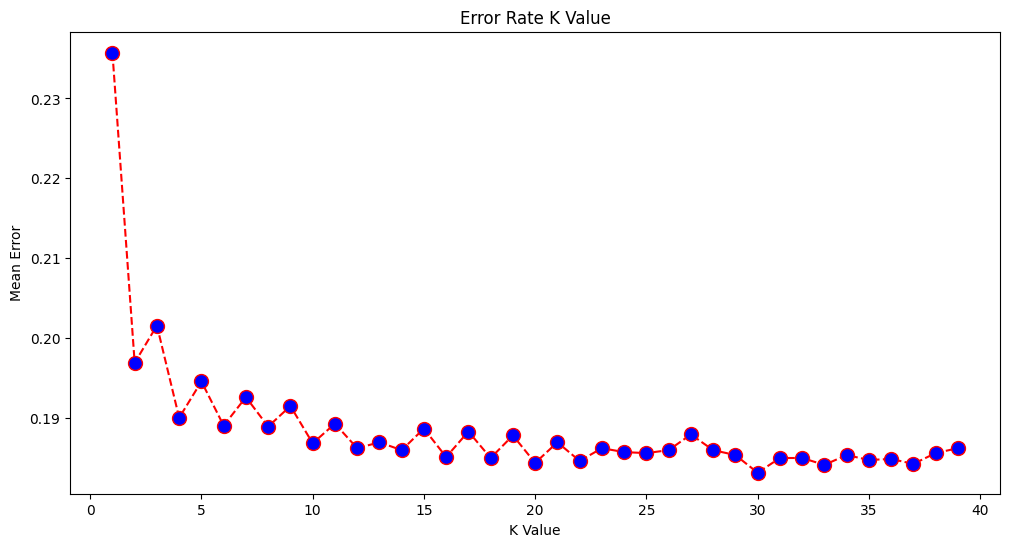

In [36]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=16, metric='minkowski', p=2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=16)

In [22]:
age = int(input("Enter New Employee's Age: "))
education = int(input("Enter New Employee's Education: "))
capital_gain = int(input("Enter New Employee's Capital Gain: "))
hours_per_week = int(input("Enter New Employee's Hours Per Week: "))
newEmp = [[age, education, capital_gain, hours_per_week]]
result = classifier.predict(sc.transform(newEmp))
print(result)

if result ==1:
  print("Employee will earn more than 50K")
else:
  print("Employee will earn less than 50K")



Enter New Employee's Age: 89
Enter New Employee's Education: 32
Enter New Employee's Capital Gain: 45
Enter New Employee's Hours Per Week: 67
[0]
Employee will earn less than 50K


In [41]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


CONFUSION MATRIX

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(Y_test, y_pred)*100))

Confusion Matrix: 
[[5833  360]
 [1156  792]]
Accuracy of the Model: 81.3782090652254%
